# Lab 7 - Wyatt Madden & Dan Crowley

In [28]:
import scipy.io as scipy_io
from scipy import sparse 
import numpy as np
import quadprog
import math
import cvxopt
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers 
from sklearn.svm import SVC

In [24]:
mat = scipy_io.loadmat('cbcl1.mat')

In [3]:
    
def softsvm(X, l, gamma):
    D,N = X.shape

    x = np.repeat(1, N + D + 1) #should it be 1? i honestly dont know
    G = np.identity(n=N+D+1) * np.concatenate((np.repeat(0.00001, N), np.repeat(1, D), np.repeat(0.00001,1)), axis = 0)
    
    P = np.identity(n=N+D+1) * np.concatenate((np.repeat(0, N), np.repeat(1, D), np.repeat(0,1)), axis = 0)
    q = np.concatenate((np.repeat(1, N), np.repeat(0, D + 1)))
    
    I_n = -1*np.identity(N)
    LdotX = -1*np.dot(np.identity(N) * l, np.transpose(X))
    lil_l = -1*l
    
    #now create the bottom part of "G", the infinity section
    
    G_bottom = -1*np.identity(n=N+D+1)
    G = np.concatenate((I_n, np.transpose(LdotX), np.transpose(lil_l)))
    #G =np.concatenate((-1*np.identity(N), np.transpose(np.dot(np.identity(N) * l, np.transpose(X))), np.transpose(-1*l)))
    G= np.transpose(G)
    
    Gstack = np.concatenate((G, G_bottom))
    h = np.concatenate((np.repeat(-1, G.shape[0]), np.zeros(N,), 100000*np.ones(D+1)))
     
    A = np.identity(n = N + D + 1)
    b= np.repeat(1, N + D +1)
    
    P = matrix(P.astype('float'))
    q = matrix(q.astype('float'))
    Gstack = matrix(Gstack.astype('float'))
    h = matrix(h.astype('float'))
    A = matrix(A.astype('float'))
    b = matrix(b.astype('float'))

    sol = cvxopt.solvers.qp(P,q,Gstack, h)
    #http://cvxopt.org/userguide/coneprog.html#quadratic-programming
    #quadprog.solve_qp()
        #min 1/2 (x.T P X + q.T x)
        #st G x <= h
        #st A x =  b
    
    #sol = quadprog.solve_qp(G, a, c, b, meq)

# distribute components of x into w, b, and xi:

    xi = np.array(sol['x'][0:(N - 1)])
    w = np.array(sol['x'][N:(N + D)])
    b = np.array(sol['x'][N + D])
    
    
    return(w, b, xi)




In [6]:
X = mat["X"]
l = mat["L"]
dims = mat["dims"]
temp = softsvm(X, l, 0.005)

w = temp[0]
b = temp[1]
xi = temp[2]

     pcost       dcost       gap    pres   dres
 0:  2.6730e+05 -7.7497e+09  4e+11  2e-02  1e+07
 1:  2.2736e+06 -4.1994e+09  4e+09  2e-04  2e+05
 2:  2.2372e+06 -1.0323e+08  1e+08  5e-06  4e+03
 3:  2.0104e+06 -9.4466e+06  1e+07  4e-07  3e+02
 4:  2.0587e+06 -8.1435e+06  1e+07  3e-07  3e+02
 5:  1.4741e+06 -2.3523e+06  4e+06  1e-07  9e+01
 6:  7.4731e+05 -5.0463e+05  1e+06  3e-08  2e+01
 7:  6.8991e+05 -3.9866e+05  1e+06  2e-08  2e+01
 8:  1.3114e+05 -4.9348e+04  2e+05  3e-09  2e+00
 9:  4.9319e+04 -1.3588e+04  6e+04  9e-10  7e-01
10:  2.6297e+04 -5.6664e+03  3e+04  4e-10  3e-01
11:  1.7740e+04 -3.1836e+03  2e+04  2e-10  2e-01
12:  1.0745e+04 -1.5279e+03  1e+04  1e-10  9e-02
13:  6.1957e+03 -6.0472e+02  7e+03  6e-11  5e-02
14:  4.0754e+03 -2.0434e+02  4e+03  3e-11  2e-02
15:  2.7109e+03  3.5676e+01  3e+03  2e-11  1e-02
16:  1.9396e+03  1.6920e+02  2e+03  8e-12  7e-03
17:  1.4587e+03  2.6008e+02  1e+03  4e-12  3e-03
18:  1.2550e+03  3.0530e+02  9e+02  3e-12  2e-03
19:  1.0173e+03  3.60

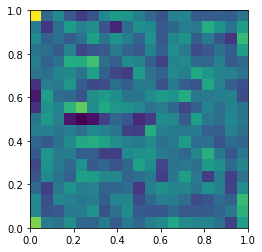

In [33]:
dat_2 = np.reshape(w, [dims[0][0], dims[0][1]])
plt.imshow(dat_2, extent=[0, 1, 0, 1])

# 3

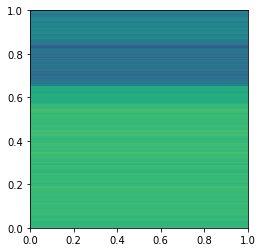

In [37]:
dat_3 = np.dot(np.transpose(X), w) + b
plt.imshow(dat_3, extent=[0, 1, 0, 1])

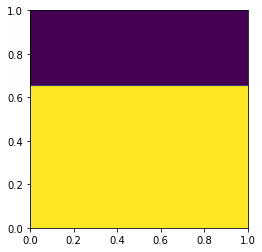

In [39]:
plt.imshow(l, extent=[0, 1, 0, 1])

# 4

# 5

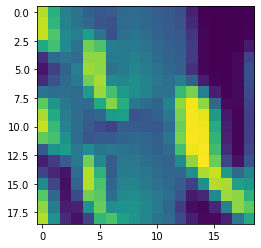

In [51]:
max_image = np.transpose(X)[np.argmax(dat_3), ]


fig = plt.imshow(np.reshape(max_image, [dims[0][0], dims[0][1]]))

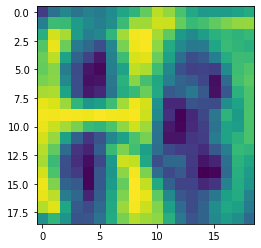

In [53]:
min_image = np.transpose(X)[np.argmin(dat_3), ]
fig = plt.imshow(np.reshape(min_image, [dims[0][0], dims[0][1]]))

# 6

In [ ]:
news = scipy_io.loadmat('news.mat')

X = news["X"]
l = news["L"]
temp = softsvm(X, l, 0.005)

w = temp[0]
b = temp[1]
xi = temp[2]

     pcost       dcost       gap    pres   dres
 0:  8.8305e+12 -6.7988e+13  2e+14  7e-01  3e+07
 1:  3.3364e+10 -3.1667e+13  3e+13  1e-01  4e+06
 2:  7.2592e+10 -2.0448e+13  2e+13  4e-02  2e+06
 3:  4.3142e+09 -2.5285e+12  3e+12  4e-03  2e+05
 4:  1.8545e+08 -1.1584e+11  1e+11  2e-04  8e+03
 5:  1.6333e+08 -3.9636e+09  4e+09  6e-06  3e+02
 6:  1.0707e+08 -6.1769e+08  7e+08  8e-07  4e+01
 7:  1.4810e+07 -3.0769e+07  5e+07  4e-08  2e+00
 8:  2.8965e+06 -7.2239e+06  1e+07  6e-09  3e-01
 9:  5.3259e+05 -1.5369e+06  2e+06  7e-10  3e-02
10:  1.3445e+05 -4.1329e+05  5e+05  7e-11  3e-03
11:  2.8626e+04 -8.9223e+04  1e+05  9e-12  4e-04
12:  6.0359e+03 -1.8360e+04  2e+04  1e-12  6e-05
13:  5.4749e+02 -1.0243e+03  2e+03  2e-16  5e-15
14:  7.2884e+01 -7.9529e+01  2e+02  2e-16  2e-15
15:  1.1470e+01 -8.1553e+00  2e+01  2e-16  2e-15
16:  3.6269e+00 -1.9709e+00  6e+00  1e-16  9e-16
17:  1.9613e+00 -5.0614e-01  2e+00  1e-16  6e-16
18:  1.5621e+00  2.1667e-01  1e+00  2e-16  4e-16
19:  1.3620e+00  7.84

In [ ]:
temp